# Vacancy research

In [4]:
from re import sub
from pandas import read_excel
import matplotlib
import matplotlib.pyplot as plt
from nltk import tokenize, corpus
from bs4 import BeautifulSoup
from wordcloud import WordCloud

%matplotlib inline

# Loading data

In [20]:
analyst_vacancies = read_excel(io='./data/vacancies-10.xlsx', usecols=['description','key_skills'], dtype={
    'description':str,	
    'key_skills':str
}).fillna('')
financial_n_investment_analyst_vacancies = read_excel(io='./data/vacancies-134.xlsx', usecols=['description','key_skills'], dtype={
    'description':str,	
    'key_skills':str
}).fillna('')
bi_n_data_analyst_vacancies = read_excel(io='./data/vacancies-156.xlsx', usecols=['description','key_skills'], dtype={
    'description':str,	
    'key_skills':str
}).fillna('')
marketing_analyst_vacancies = read_excel(io='./data/vacancies-163.xlsx', usecols=['description','key_skills'], dtype={
    'description':str,	
    'key_skills':str
})
product_analyst_vacancies = read_excel(io='./data/vacancies-164.xlsx', usecols=['description','key_skills'], dtype={
    'description':str,	
    'key_skills':str
}).fillna('')

description  \
0  <p>В Центральном офисе компании Нестле открыта...   
1  <p>Мы<strong> </strong>— команда <strong>«Наци...   
2  <p><strong>EUPHORIA - </strong>это российский ...   
3  <strong>Обязанности:</strong> <ul> <li> <p>Сбо...   
4  <strong>ОБЯЗАННОСТИ</strong> <ul> <li>Сбор и а...   

                                          key_skills  
0  Деловая переписка,Подготовка презентаций,Делов...  
1                                                     
2  E-Commerce,Аналитика продаж,Маркетплейсы,Анали...  
3  Статистический анализ,Сбор и анализ информации...  
4  SQL,MS PowerPoint,Python,Сбор и анализ информа...

# Compare description key word clouds

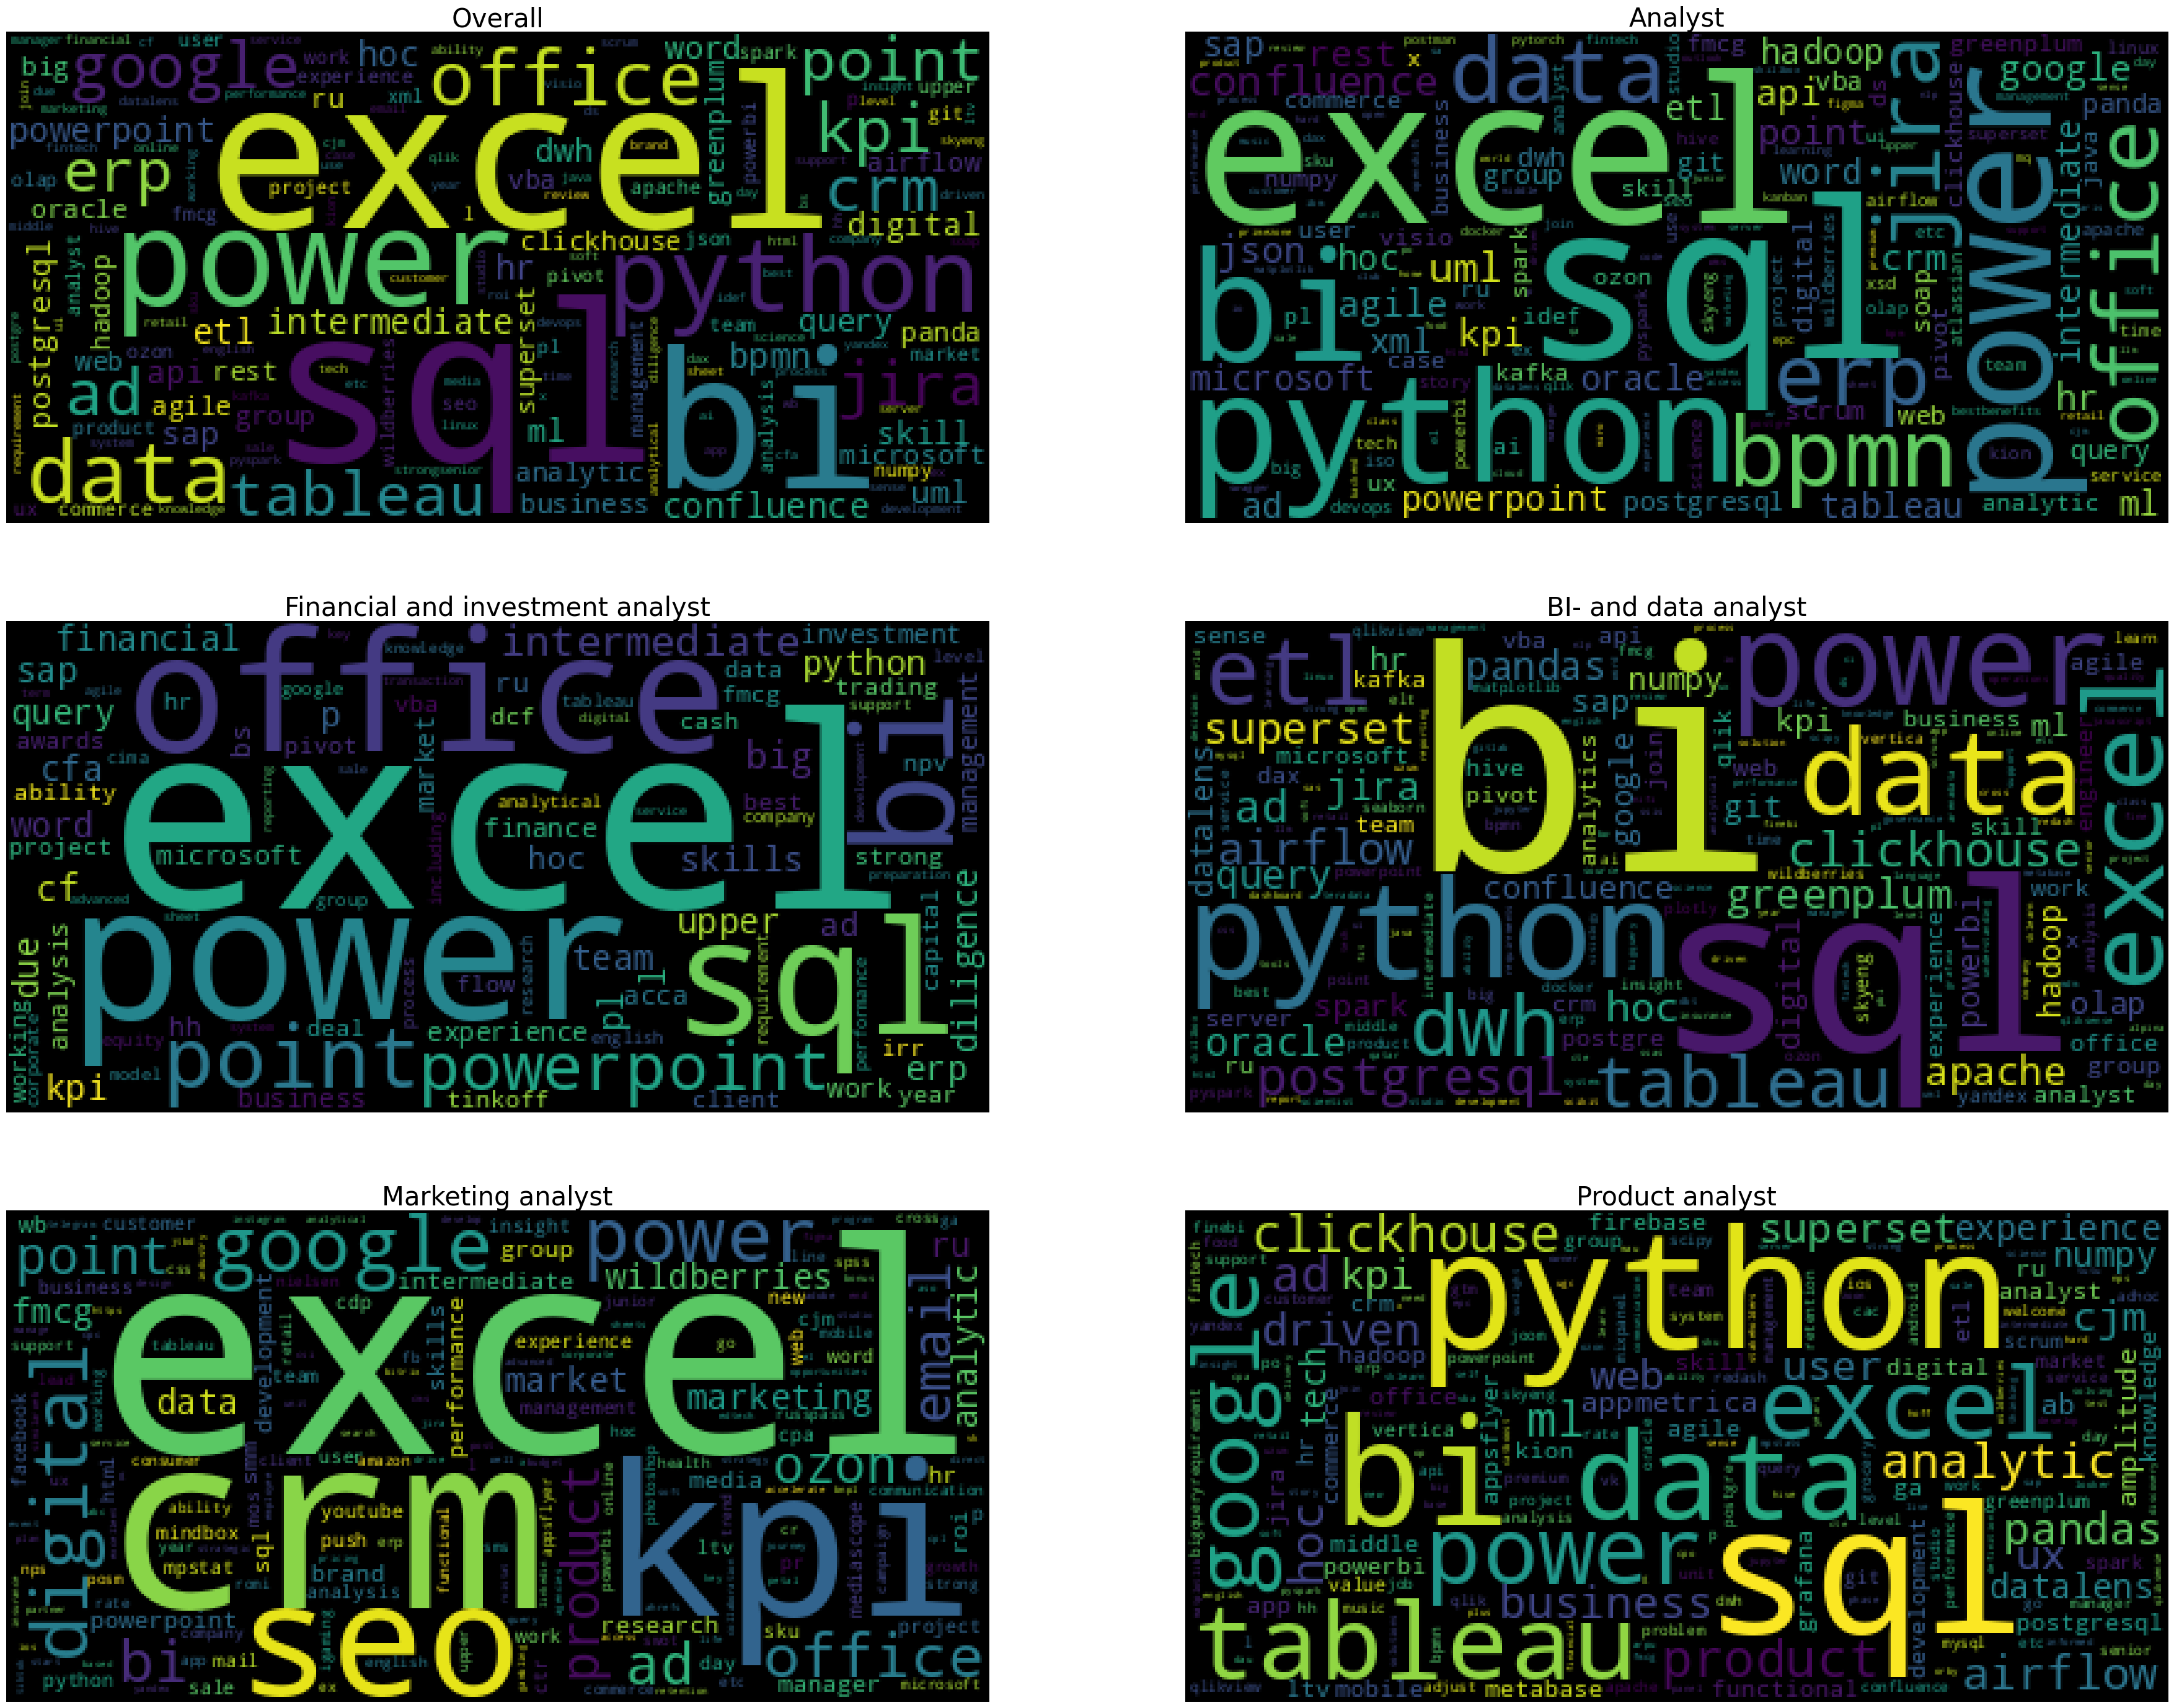

In [5]:
def get_text_for_word_cloud(descriptions):
    raw_mega_description = ''.join(descriptions)
    demarkuped_description = BeautifulSoup(raw_mega_description, 'lxml').text.lower()
    latin_n_spaces_description = sub(r'[^\x00-\x7f]|[0-9]|[–·\.,;:!?()-/\%\&\\«»•\+—`\']',r' ', demarkuped_description)
    words = tokenize.word_tokenize(latin_n_spaces_description)
    stopwords_en = corpus.stopwords.words('english')
    cleaned_words = list(w for w in words if w not in stopwords_en and w not in ['a','b','c','d','e','ms'])
    return ' '.join(cleaned_words)

description_cloud_texts = {
    'analyst': get_text_for_word_cloud(analyst_vacancies['description']),
    'financial_n_investment_analyst': get_text_for_word_cloud(financial_n_investment_analyst_vacancies['description']),
    'bi_n_data_analyst': get_text_for_word_cloud(bi_n_data_analyst_vacancies['description']),
    'marketing_analyst': get_text_for_word_cloud(marketing_analyst_vacancies['description']),
    'product_analyst': get_text_for_word_cloud(product_analyst_vacancies['description']),
}

description_collection = [
    {
        'name': 'Overall',
        'text': ' '.join([
            description_cloud_texts['analyst'],
            description_cloud_texts['financial_n_investment_analyst'],
            description_cloud_texts['bi_n_data_analyst'],
            description_cloud_texts['marketing_analyst'],
            description_cloud_texts['product_analyst']
        ])
    },
    {
        'name': 'Analyst',
        'text': description_cloud_texts['analyst']
    },
    {
        'name': 'Financial and investment analyst',
        'text': description_cloud_texts['financial_n_investment_analyst']
    },
    {
        'name': 'BI- and data analyst',
        'text': description_cloud_texts['bi_n_data_analyst']
    },
    {
        'name': 'Marketing analyst',
        'text': description_cloud_texts['marketing_analyst']
    },
    {
        'name': 'Product analyst',
        'text': description_cloud_texts['product_analyst']
    }
]

descriptions_figure = plt.figure(figsize=(45,35))
no_meta_variable = ''
for i, item in enumerate(description_collection):
    description_word_cloud = descriptions_figure.add_subplot(3,2,i+1)
    no_meta_variable = description_word_cloud.axis('off')
    no_meta_variable = description_word_cloud.set_title(item['name'], fontsize=30)
    no_meta_variable = description_word_cloud.imshow(WordCloud(collocations=False).generate(item['text']))

# Compare key skill word clouds

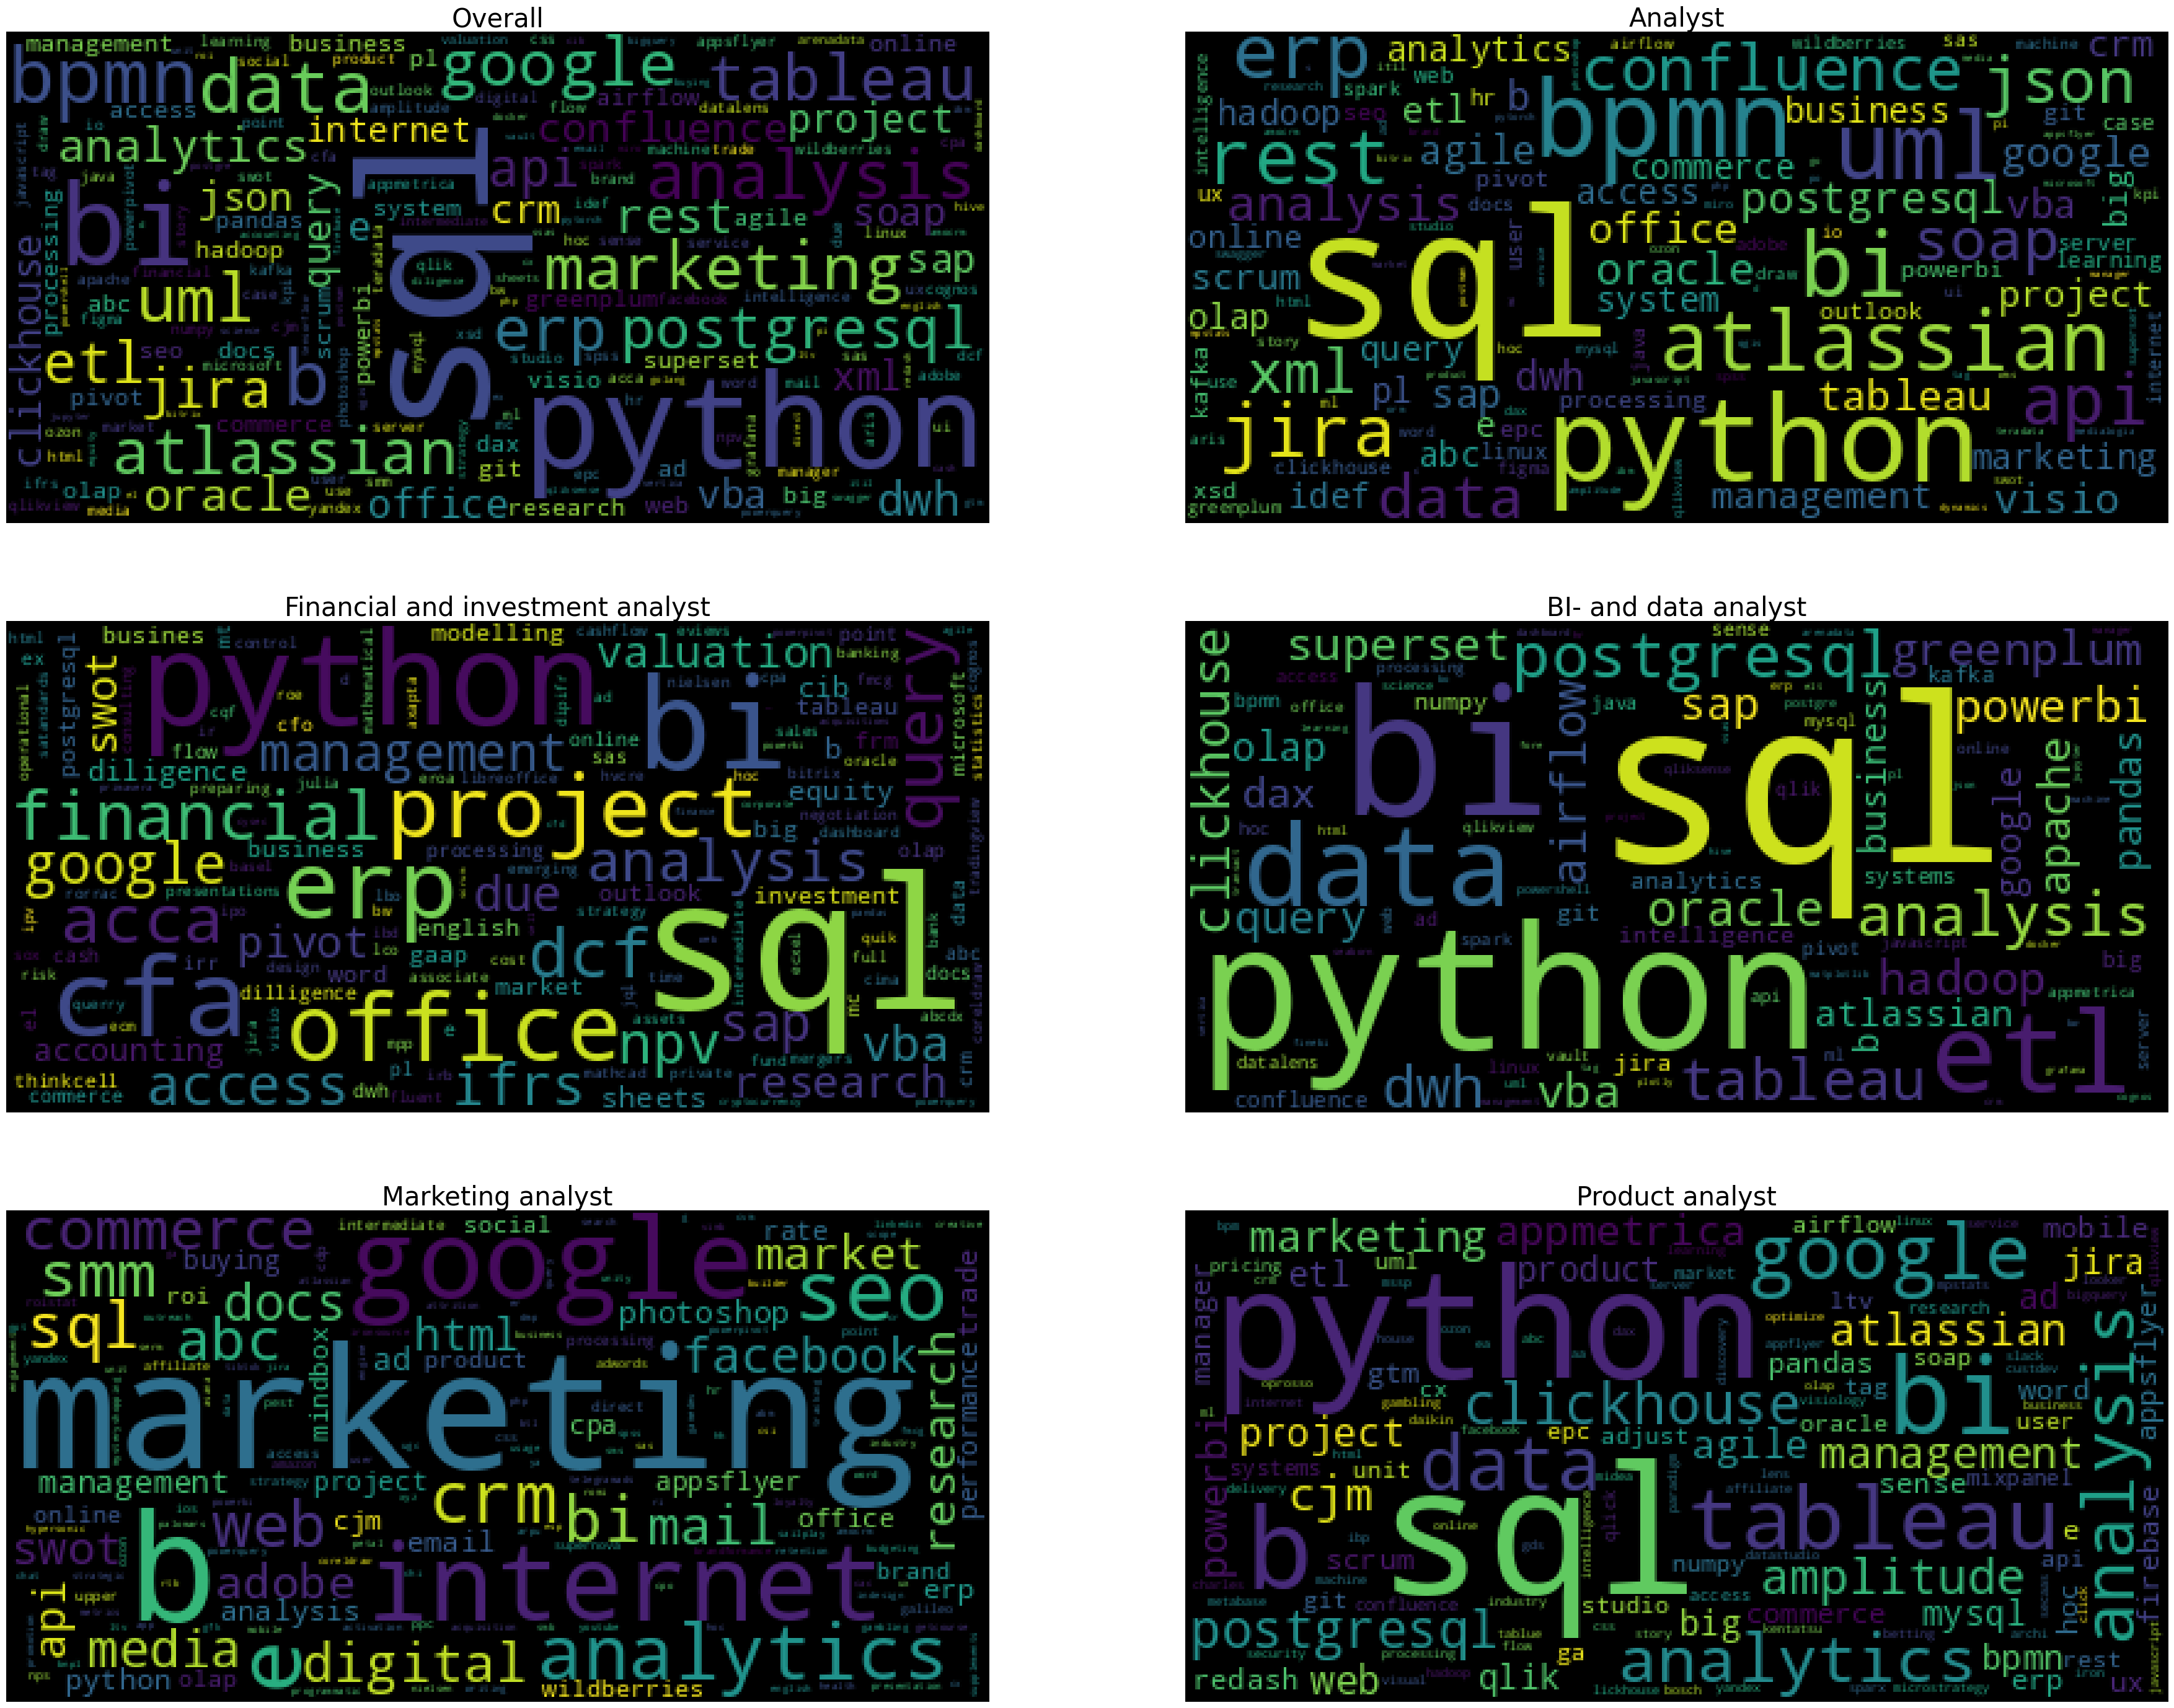

In [8]:
def clear_letter_words(word):
    return word not in ['analytical', 'asset', 'c', 'excel''l', 'm', 'ms', 'p', 'power', 'powerpoint','skills']
    
def get_key_skill_cloud_text(key_skills):
    raw_mega_skills = ','.join(key_skills.fillna(''))
    raw_mega_skills = raw_mega_skills.lower()
    latin_n_spaces_skills = sub(r'[^\x00-\x7f]|[0-9]|[–·\.,;:!?()-/\%\&\\«»•\+—`\']',r' ', raw_mega_skills)
    skills = tokenize.word_tokenize(latin_n_spaces_skills)
    return ' '.join(filter(clear_letter_words, latin_n_spaces_skills.split(' ')))

key_skill_cloud_texts = {
    'analyst': get_key_skill_cloud_text(analyst_vacancies['key_skills']),
    'financial_n_investment_analyst': get_key_skill_cloud_text(financial_n_investment_analyst_vacancies['key_skills']),
    'bi_n_data_analyst': get_key_skill_cloud_text(bi_n_data_analyst_vacancies['key_skills']),
    'marketing_analyst': get_key_skill_cloud_text(marketing_analyst_vacancies['key_skills']),
    'product_analyst': get_key_skill_cloud_text(product_analyst_vacancies['key_skills']),
}

key_skills_collection = [
    {
        'name': 'Overall',
        'text': ' '.join([
            key_skill_cloud_texts['analyst'],
            key_skill_cloud_texts['financial_n_investment_analyst'],
            key_skill_cloud_texts['bi_n_data_analyst'],
            key_skill_cloud_texts['marketing_analyst'],
            key_skill_cloud_texts['product_analyst']
        ])
    },
    {
        'name': 'Analyst',
        'text': key_skill_cloud_texts['analyst']
    },
    {
        'name': 'Financial and investment analyst',
        'text': key_skill_cloud_texts['financial_n_investment_analyst']
    },
    {
        'name': 'BI- and data analyst',
        'text': key_skill_cloud_texts['bi_n_data_analyst']
    },
    {
        'name': 'Marketing analyst',
        'text': key_skill_cloud_texts['marketing_analyst']
    },
    {
        'name': 'Product analyst',
        'text': key_skill_cloud_texts['product_analyst']
    }
]

key_skills_figure = plt.figure(figsize=(45,35))
no_meta_variable = ''
for i, item in enumerate(key_skills_collection):
    key_skills_word_cloud = key_skills_figure.add_subplot(3,2,i+1)
    no_meta_variable = key_skills_word_cloud.axis('off')
    no_meta_variable = key_skills_word_cloud.set_title(item['name'], fontsize=30)
    no_meta_variable = key_skills_word_cloud.imshow(WordCloud(collocations=False).generate(item['text']))

# Descriptions VS skills

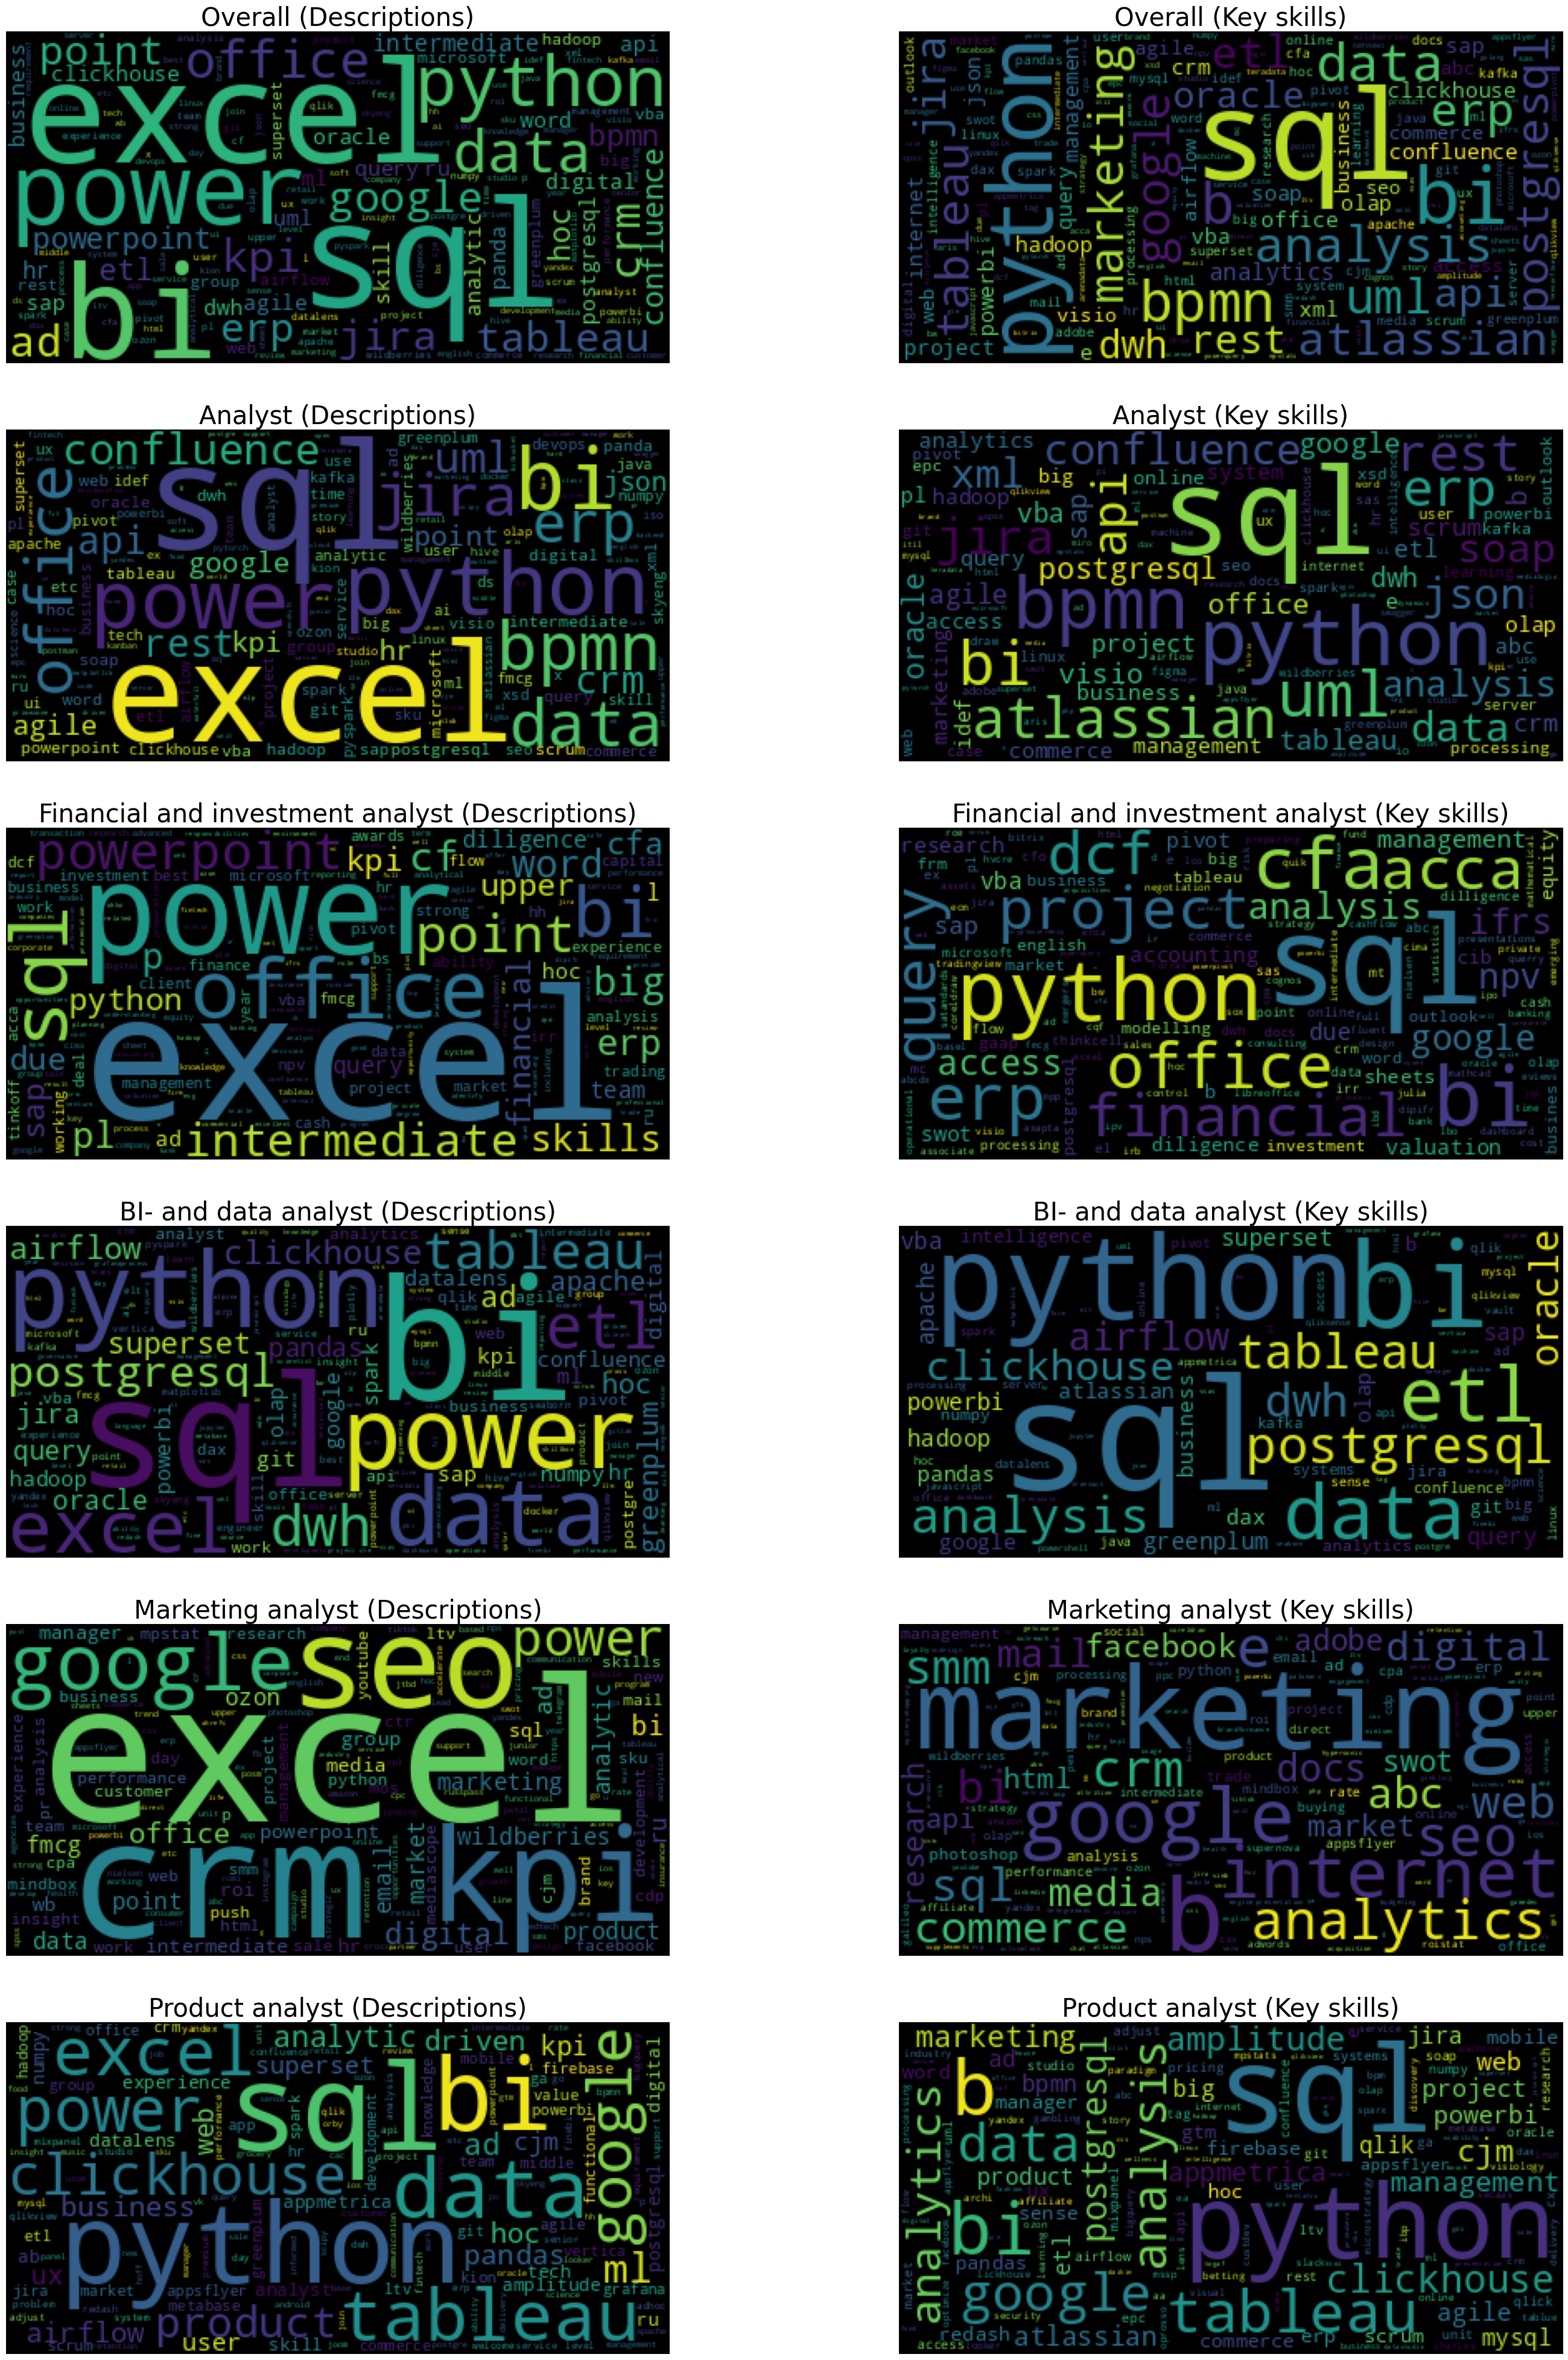

In [18]:
collection = []
key_skills_index = 0
description_index = 0
for i in range(12):
    if i % 2 == 0:
        item = description_collection[description_index].copy()
        item['name'] = item['name'] + ' (Descriptions)'
        collection.append(item)
        description_index+=1
    else:
        item = key_skills_collection[key_skills_index].copy()
        item['name'] = item['name'] + ' (Key skills)'
        collection.append(item)
        key_skills_index+=1

comparison_figure = plt.figure(figsize=(35,50))
no_meta_variable = ''
for i, item in enumerate(collection):
    comparison_word_cloud = comparison_figure.add_subplot(6,2,i+1)
    no_meta_variable = comparison_word_cloud.axis('off')
    no_meta_variable = comparison_word_cloud.set_title(item['name'], fontsize=30)
    no_meta_variable = comparison_word_cloud.imshow(WordCloud(collocations=False).generate(item['text']))